![license_header_logo](../../../images/license_header_logo.png)

> **Copyright (c) 2021 CertifAI Sdn. Bhd.**<br>
<br>
This program is part of OSRFramework. You can redistribute it and/or modify
<br>it under the terms of the GNU Affero General Public License as published by
<br>the Free Software Foundation, either version 3 of the License, or
<br>(at your option) any later version.
<br>
<br>This program is distributed in the hope that it will be useful
<br>but WITHOUT ANY WARRANTY; without even the implied warranty of
<br>MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
<br>GNU Affero General Public License for more details.
<br>
<br>You should have received a copy of the GNU Affero General Public License
<br>along with this program.  If not, see <http://www.gnu.org/licenses/>.
<br>

# Introduction

**Word embeddings** are a modern approach for **representing text** in natural language processing.

[Word embedding](https://machinelearningmastery.com/what-are-word-embeddings/) algorithms like **word2vec**, **doc2vec** and **GloVe** are key to the state-of-the-art results achieved by neural network models on natural language processing problems like machine translation.

In this notebook, you will discover how to **train and load word embedding models** for natural language processing applications in Python using **Gensim**.

# What will we accomplish?

By the end of this tutorial, you will know:

1. How to train your own word2vec word embedding model on text data.


2. How to visualize a trained word embedding model using Principal Component Analysis.


3. How to train simple doc2vec embeddings using Gensim


4. How to load pre-trained word2vec and GloVe word embedding models from Google and Stanford.

# Notebook Content

* [Introduction to Word Embeddings](#Introduction-to-Word-Embeddings)


* [Gensim Library](#Gensim-Python-Library)


* [Develop Word2Vec Embedding](#Develop-Word2Vec-Embedding)


* [Visualize Word Embedding](#Visualize-Word-Embedding)


* [Load Google’s Word2Vec Embedding](#Load-Google’s-Word2Vec-Embedding)


* [Load Stanford’s GloVe Embedding](#Load-Stanford’s-GloVe-Embedding)

# Introduction to Word Embeddings

A **word embedding** is an approach to provide a **dense vector representation** of words that capture something about their meaning.

Word embeddings are an improvement over simpler bag-of-word model word encoding schemes like word counts and frequencies that result in large and sparse vectors (mostly 0 values) that describe documents but not the meaning of the words.

Word embeddings work by using an algorithm to train a set of **fixed-length dense and continuous-valued vectors** based on a large corpus of text. Each word is represented by a point in the embedding space and these points are learned and moved around based on the words that surround the target word.

It is defining a word by the company that it keeps that allows the word embedding to learn something about the **meaning of words**. The vector space representation of the words provides a projection where words with similar meanings are locally clustered within the space.

The use of word embeddings over other text representations is one of the key methods that has led to breakthrough performance with deep neural networks on problems like machine translation.

In this tutorial, we are going to look at how to implement **word2vec** and **doc2vec** algorithm using Gensim as well as use two different pretrained word embedding methods called **word2vec** by researchers at Google and **GloVe** by researchers at Stanford.

# Gensim Python Library

[Gensim](https://radimrehurek.com/gensim/index.html) is an open source Python library for natural language processing, with a focus on topic modeling. It was developed and is maintained by the Czech natural language processing researcher Radim Řehůřek and his company RaRe Technologies.

<img src="../../../images/gensim.png" width="400" height="500"/>
     
It is not an everything-including-the-kitchen-sink NLP research library (like NLTK); instead, Gensim is a mature, focused, and efficient suite of NLP tools for **topic modeling**. Most notably for this tutorial, it supports an implementation of the Word2Vec and Doc2Vec embedding for learning new word vectors from text.

It also provides tools for loading **pre-trained word embeddings** in a few formats and for making use and querying a loaded embedding.

Now, we will use Gensim for word embeddings.

# Develop Word2Vec Embedding

Word2vec is one algorithm for learning a word embedding from a text corpus.

There are two main training algorithms that can be used to learn the embedding from text; they are **continuous bag of words (CBOW)** and **skip grams**.

We will not get into the algorithms other than to say that they generally look at a **window of words** for each target word to provide context and in turn meaning for words. The approach was developed by Tomas Mikolov, formerly at Google and currently at Facebook.

Word2Vec models require a lot of text, e.g. the entire Wikipedia corpus. Nevertheless, we will demonstrate the principles using a small in-memory example of text.

Gensim provides the `Word2Vec` class for working with a Word2Vec model.

In [1]:
# Import Word2Vec model
from gensim.models import Word2Vec

Specifically, each sentence must be **tokenized**, meaning divided into words and prepared (e.g. perhaps pre-filtered and perhaps converted to a preferred case).

The sentences could be text loaded into memory, or an iterator that progressively loads text, required for very large text corpora.

In [2]:
# Define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
            ['this', 'is', 'the', 'second', 'sentence'],
            ['yet', 'another', 'sentence'],
            ['one', 'more', 'sentence'],
            ['and', 'the', 'final', 'sentence']]

There are many parameters on `Word2Vec` constructor; a few noteworthy arguments you may wish to configure are:

* **size**: (default 100) The number of **dimensions** of the embedding,
  </br>e.g. the length of the **dense vector** to represent each token (word).
  
  
* **window**: (default 5) The maximum distance between a target word and words around the target word.


* **min_count**: (default 5) The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.


* **workers**: (default 3) The number of threads to use while training.


* **sg**: (default 0 or CBOW) The training algorithm, either CBOW (0) or skip gram (1).


The defaults are often good enough when just getting started. If you have a lot of cores, as most modern computers do, I strongly encourage you to increase workers to match the number of cores (e.g. 8).

In [3]:
# Train model
model = Word2Vec(sentences, min_count=1)

In [4]:
# Summarize the loaded model
print(model)

Word2Vec(vocab=14, vector_size=100, alpha=0.025)


After the model is trained, it is accessible via the **`wv`** attribute. This is the actual **word vector model** in which queries can be made.

In [5]:
# Print the learned vocabulary of tokens (words)
words = list(model.wv.key_to_index)
print(words)

['sentence', 'the', 'is', 'this', 'final', 'and', 'more', 'one', 'another', 'yet', 'second', 'word2vec', 'for', 'first']


You also can review the **embedded vector** for a specific token.

In [6]:
# Access vector for one word
print(model.wv['sentence'])

[-5.3622725e-04  2.3643016e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588715e-03  8.9729885e-03
 -5.0154282e-03 -3.7633730e-03  7.3805046e-03 -1.5334726e-03
 -4.5366143e-03  6.5540504e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488189e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508893e-03 -3.4053659e-03 -9.4640255e-04  5.7685734e-03
 -7.5216386e-03 -3.9361049e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337698e-03 -1.9377422e-03
  8.0774352e-03 -5.9308959e-03  4.5161247e-05 -4.7537349e-03
 -9.6035507e-03  5.0072931e-03 -8.7595871e-03 -4.3918253e-03
 -3.5099984e-05 -2.9618264e-04 -7.6612402e-03  9.6147414e-03
  4.9820566e-03  9.2331432e-03 -8.1579182e-03  4.4957972e-03
 -4.1370774e-03  8.2453492e-04  8.4986184e-03 -4.4621779e-03
  4.5175003e-03 -6.7869616e-03 -3.5484887e-03  9.3985079e-03
 -1.5776539e-03  3.2137157e-04 -4.1406299e-03 -7.6826881e-03
 -1.5080094e-03  2.46979

Finally, a trained model can then be **saved to file** by calling the `save()` function on the **Word2Vec model**.

In [7]:
# Save model
model.save('model/word2vec.model')

When getting started, you can save the learned model in **ASCII format** and review the contents.

You can do this by setting `binary=False` when calling the `save_word2vec_format()` function.

In [8]:
# Save model as text
model.wv.save_word2vec_format('model/word2vec.txt', binary=False)

The saved model can then be **loaded** again by calling the `Word2Vec.load()` function.

In [9]:
# Load model
loaded_model = Word2Vec.load('model/word2vec.model')

You can see that with a little work to prepare your text document, you can create your own word embedding very easily with Gensim.

# Visualize Word Embedding

After you learn word embedding for your text data, it can be nice to explore it with **visualization**.

You can use classical projection methods to reduce the high-dimensional word vectors to two-dimensional plots and plot them on a graph.

The visualizations can provide a qualitative diagnostic for your learned model.

In [10]:
# Retrieve all of the vectors from a trained model

X = model.wv[model.wv.key_to_index]

print(X)

[[-5.3622725e-04  2.3643016e-04  5.1033497e-03 ... -7.0415614e-03
   9.0145587e-04  6.3925339e-03]
 [-8.6196875e-03  3.6657380e-03  5.1898835e-03 ... -2.3915148e-03
  -9.5100952e-03  4.5058774e-03]
 [ 9.4563962e-05  3.0773187e-03 -6.8126465e-03 ...  5.1259040e-04
   8.2130842e-03 -7.0190406e-03]
 ...
 [ 9.7702928e-03  8.1651136e-03  1.2809705e-03 ... -2.9727411e-03
  -4.9318983e-03 -2.3151112e-03]
 [-1.9442177e-03 -5.2675223e-03  9.4471117e-03 ...  5.9827138e-03
   6.8153618e-03  7.8225443e-03]
 [-9.5001198e-03  9.5622232e-03 -7.7707553e-03 ... -3.1351089e-03
  -6.3388203e-03  9.8700766e-03]]


We can then train a projection method on the vectors from those methods offered in **scikit-learn**, then use **matplotlib** to plot the projection as a scatter plot.

## Plot Word Vectors Using PCA

We can create a **2-dimensional PCA model** of the word vectors using the scikit-learn `PCA` class.

In [11]:
# Import PCA from sklearn
from sklearn.decomposition import PCA

In [12]:
# Fit a 2d PCA model to the vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)

In [13]:
result.shape

(14, 2)

The resulting projection can be plotted using **matplotlib** as follows, pulling out the two dimensions as **x** and **y** coordinates.

In [14]:
# Import pyplot as plt
from matplotlib import pyplot as plt

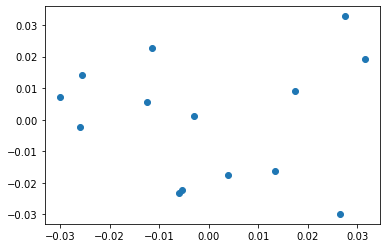

In [15]:
# Create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
plt.show()

We can go one step further and **annotate the points** on the graph with the words themselves.

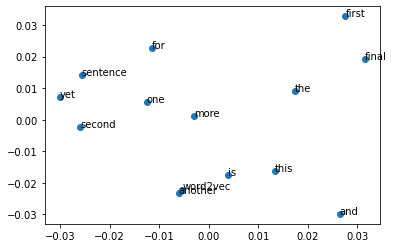

In [16]:
words = list(model.wv.key_to_index)

plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

In [17]:
plt.show()

**Note**: Your results may vary given the **stochastic nature** of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

It is hard to pull much meaning out of the graph given such a **tiny corpus** was used to fit the model.

# Develop Doc2Vec Embedding

Doc2vec (also known as: paragraph2vec or sentence embedding) is the modified version of word2vec. The main objective of doc2vec is to **convert sentence or paragraph to vector (numeric) form**. In Natural Language Processing, Doc2Vec is used to find related sentences for a given sentence.

![Doc2Vec](../../../images/doc2vec.png)

In this section, we are going to code a  **simple implementation of doc2vec** using Python and Gensim.

In [18]:
# Exapmple document (list of sentences)
doc = ["I love data science",
        "I love coding in python",
        "I love building NLP tool",
        "This is a good phone",
        "This is a good TV",
        "This is a good laptop"]

As in word2vec implementation, we need to tokenize each sentence into words. Here we are going to use `word_tokenize` function from `nltk` library to tokenize each sentence.

In [19]:
# Import word_tokenize function
from nltk.tokenize import word_tokenize

In [20]:
# Start tokenization
tokenized_doc = []
for d in doc:
    tokenized_doc.append(word_tokenize(d.lower()))
    
tokenized_doc

[['i', 'love', 'data', 'science'],
 ['i', 'love', 'coding', 'in', 'python'],
 ['i', 'love', 'building', 'nlp', 'tool'],
 ['this', 'is', 'a', 'good', 'phone'],
 ['this', 'is', 'a', 'good', 'tv'],
 ['this', 'is', 'a', 'good', 'laptop']]

![Doc2Vec Implementation](../../../images/doc2vec_implementation.gif)

From the figure above, we can observe that there is a `document_id` inserted into the vector. This is the key implementation of Doc2Vec and here we using `TaggedDocument` function to assign tag (id) to each documents.

In [21]:
# Import TaggedDocument function
from gensim.models.doc2vec import TaggedDocument

In [22]:
# Convert tokenized document into gensim formated tagged data
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_doc)]

tagged_data

[TaggedDocument(words=['i', 'love', 'data', 'science'], tags=[0]),
 TaggedDocument(words=['i', 'love', 'coding', 'in', 'python'], tags=[1]),
 TaggedDocument(words=['i', 'love', 'building', 'nlp', 'tool'], tags=[2]),
 TaggedDocument(words=['this', 'is', 'a', 'good', 'phone'], tags=[3]),
 TaggedDocument(words=['this', 'is', 'a', 'good', 'tv'], tags=[4]),
 TaggedDocument(words=['this', 'is', 'a', 'good', 'laptop'], tags=[5])]

Now we are ready to train our doc2vec model.

In this tutorial, we are using **distributed memory paragraph vector (PV-DM)** model as doc2vec.

**Note**: `dm=1` **means distributed memory (PV-DM)** and `dm=0` means **distributed bag of words (PV-DBOW)**.

In [23]:
# Import Doc2Vec model
from gensim.models.doc2vec import Doc2Vec

In [24]:
# Train Doc2Vec model
model = Doc2Vec(tagged_data, vector_size=20, window=2, min_count=1, workers=4, epochs = 100, dm=1)

You can access the vocabulary list in the doc2vec using `wv` attributes.

In [25]:
list(model.wv.key_to_index)

['i',
 'love',
 'good',
 'a',
 'is',
 'this',
 'in',
 'data',
 'science',
 'coding',
 'laptop',
 'python',
 'building',
 'tv',
 'tool',
 'phone',
 'nlp']

You also can easily find the most similar document using `model.docvecs.most_similar` function.

In [26]:
# Find most similar doc 
test_doc = word_tokenize("That is a good device".lower())

model.dv.most_similar(positive=[model.infer_vector(test_doc)],topn=3)

[(3, 0.31323811411857605), (4, 0.1339501142501831), (1, 0.04293661192059517)]

Similar to word2vec, a trained model can then be saved to file by calling the `save()` function on the Doc2Vec model.

In [27]:
filename = "model/doc2vec.model"
model.save(filename)

The saved model can then be loaded again by calling the `Doc2Vec.load()` function.

In [28]:
loaded_model = Doc2Vec.load("model/doc2vec.model")

# Load Google’s Word2Vec Embedding

Training your own word vectors may be the best approach for a given NLP problem.

But it can take a long time, a fast computer with **a lot of RAM and disk space**, and perhaps some expertise in finessing the input data and training algorithm.

An alternative is to simply use an existing **pre-trained word embedding**.

Along with the paper and code for word2vec, Google also published a pre-trained word2vec model on the [Word2Vec Google Code Project](https://code.google.com/archive/p/word2vec/).

A pre-trained model is nothing more than a file containing **tokens** and their **associated word vectors**. The pre-trained Google word2vec model was trained on **Google news data (about 100 billion words)**; it contains 3 million words and phrases and was fit using **300-dimensional word vectors**.

It is a 1.53 Gigabytes file. You can download it from here:

* [GoogleNews-vectors-negative300.bin.gz](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?resourcekey=0-wjGZdNAUop6WykTtMip30g)

Unzipped, the binary file (GoogleNews-vectors-negative300.bin) is 3.4 Gigabytes.

**Note**: You should have "GoogleNews-vectors-negative300.bin`dataset` folder, else you may download it from the link above.

Gensim library provides tools to load this file. Specifically, you can call the `KeyedVectors.load_word2vec_format()` function to load model into memory.

In [29]:
# Import KeyedVectors
from gensim.models import KeyedVectors

In [30]:
# Load the google word2vec model
filename = '../../../resources/day_07/GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

Another interesting thing that you can do is do a little **linear algebra arithmetic** with words. For example, a popular example described in lectures and introduction papers is:

> queen = (king - man) + woman

That is the word queen is the closest word given the subtraction of the notion of man from king and adding the word woman. The “man-ness” in king is replaced with “woman-ness” to give us queen. A very cool concept.

Gensim provides an interface for performing these types of operations in the `most_similar()` function on the trained or loaded model.

In [31]:
# Calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7118193507194519)]


# Load Stanford’s GloVe Embedding

Stanford researchers also have their own word embedding algorithm like word2vec called **[Global Vectors for Word Representation](https://nlp.stanford.edu/projects/glove/)**, or **GloVe** for short.

We won’t get into the details of the differences between word2vec and GloVe here, but generally, NLP practitioners seem to prefer GloVe at the moment based on results.

Like word2vec, the GloVe researchers also provide **pre-trained word vectors**, in this case, a great selection to choose from.

You can download the smallest GloVe pre-trained model from the [GloVe](https://nlp.stanford.edu/projects/glove/) website and load them easily with gensim. It an **822 Megabyte zip** file with 4 different models (50, 100, 200 and 300-dimensional vectors) trained on **Wikipedia data** with 6 billion tokens and a **400,000 word vocabulary**.

The direct download link is here:

* [glove.6B.zip](http://nlp.stanford.edu/data/glove.6B.zip)

The distinct different between GloVe text vector and word2vec bin files is the header. To read the GolVe text vector, we use `KeyedVectors.load_word2vec_format` function with parameters `binary=False` and `no_header=True`.

In [32]:
# Import KeyedVectors
from gensim.models import KeyedVectors

Now we can load GolVe text vector and perform the same `(king – man) + woman = ?` test as in the previous section. 

Note that the converted file is **ASCII format**, not binary, so we set `binary=False` when loading.

In [33]:
from gensim.models import KeyedVectors
# Load the Stanford GloVe model
filename = '../../../resources/.vector_cache/glove.6B.100d.txt'
model = KeyedVectors.load_word2vec_format(filename, binary=False, no_header=True)
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7698541283607483)]


# Summary

In this tutorial, you discovered how to develop and load word embedding layers in Python using **Gensim**.

Specifically, you learned:

* How to train your own word2vec and doc2vec word embedding model on text data.
* How to visualize a trained word embedding model using Principal Component Analysis.
* How to load pre-trained word2vec and GloVe word embedding models from Google and Stanford.

# Contributors

**Author**
<br>Chee Lam

# References

1. [How to Develop Word Embeddings in Python with Gensim](https://machinelearningmastery.com/develop-word-embeddings-python-gensim/)

2. [Gensim Doc2Vec Python implementation](https://thinkinfi.com/gensim-doc2vec-python-implementation/)